In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import elo
from copy import deepcopy
import matplotlib.pyplot as plt

In [59]:
standings = {
    'Man City':86,
    'Liverpool':85,
    'Tottenham':67,
    'Arsenal': 66,
    'Chelsea': 66,
    'Man United':64,
    'Liecester':48,
    'Wolves':48,
    'Everton':46,
    'Watford':49,
    'West Ham':43,
    'Bournemouth':41,
    'Crystal Palace':39,
    'Burnley':39,
    'Newcastle':38,
    'Southampton':36,
    'Brighton':34,
    'Cardiff':31,
    'Fulham':23,
    'Huddersfield':14,
    
}

In [60]:
ratings = {
     'Man City':2008,
    'Liverpool':2006,
    'Tottenham':1916,
    'Arsenal': 1901,
    'Chelsea': 1864,
    'Man United':1888,
    'Liecester':1709,
    'Wolves':1685,
    'Everton':1724,
    'Watford':1704,
        'West Ham':1679,
    'Bournemouth':1686,
    'Crystal Palace':1705,
    'Burnley':1682,
    'Newcastle':1685,
    'Southampton':1688,
        'Brighton':1598,
        'Cardiff':1590,
    'Fulham':1575,
    'Huddersfield':1505,
}

In [61]:
fixtures = [
    ['Newcastle','Southampton'],
    ['Everton','Man United'],
    ['Cardiff','Liverpool'],
    ['Arsenal','Crystal Palace'],
    ['Chelsea','Burnley'],
    ['Watford','Southampton'],
    ['Tottenham','Brighton'],
    ['Wolves','Arsenal'],
    ['Man United','Man City'],
    ['Liverpool','Huddersfield'],
    ['Tottenham','West Ham'],
    ['Southampton','Bournemouth'],
    ['Fulham','Cardiff'],
    ['Watford','Wolves'],
    ['Crystal Palace','Everton'],
    ['Brighton','Newcastle'],
    ['Burnley','Man City'],
    ['Man United','Chelsea'],
    ['Liecester','Arsenal'],
    ['Everton','Burnley'],
    ['Man City','Liecester'],
    ['West Ham','Southampton'],
    ['Wolves','Fulham'],
    ['Chelsea','Watford'],
    ['Arsenal','Brighton'],
    ['Cardiff','Crystal Palace'],
    ['Huddersfield','Man United'],
    ['Newcastle','Liverpool'],
    ['Bournemouth','Tottenham'],
    ['Tottenham','Everton'],
    ['Man United','Cardiff'],
    ['Watford','West Ham'],
    ['Southampton','Huddersfield'],
    ['Liecester','Chelsea'],
    ['Fulham','Newcastle'],
    ['Liverpool','Wolves'],
    ['Crystal Palace','Bournemouth'],
    ['Brighton','Man City'],
    ['Burnley','Arsenal'],
]

In [62]:
l = elo.League(ratings=deepcopy(ratings),
          standings=deepcopy(standings),
          fixtures=deepcopy(fixtures))

In [82]:
points_totals = []
rankings = []
SAMPLE_NUM = 100000
for i, _ in enumerate(range(SAMPLE_NUM)):
    if i % 1000 == 0: print(f'{i}/{SAMPLE_NUM}')
    l = elo.League(ratings=deepcopy(ratings),
          standings=deepcopy(standings),
          fixtures=deepcopy(fixtures))
    final_points, final_rankings = l.sim()
    points_totals.append(final_points)
    rankings.append(final_rankings)

0/100000
1000/100000
2000/100000
3000/100000
4000/100000
5000/100000
6000/100000
7000/100000
8000/100000
9000/100000
10000/100000
11000/100000
12000/100000
13000/100000
14000/100000
15000/100000
16000/100000
17000/100000
18000/100000
19000/100000
20000/100000
21000/100000
22000/100000
23000/100000
24000/100000
25000/100000
26000/100000
27000/100000
28000/100000
29000/100000
30000/100000
31000/100000
32000/100000
33000/100000
34000/100000
35000/100000
36000/100000
37000/100000
38000/100000
39000/100000
40000/100000
41000/100000
42000/100000
43000/100000
44000/100000
45000/100000
46000/100000
47000/100000
48000/100000
49000/100000
50000/100000
51000/100000
52000/100000
53000/100000
54000/100000
55000/100000
56000/100000
57000/100000
58000/100000
59000/100000
60000/100000
61000/100000
62000/100000
63000/100000
64000/100000
65000/100000
66000/100000
67000/100000
68000/100000
69000/100000
70000/100000
71000/100000
72000/100000
73000/100000
74000/100000
75000/100000
76000/100000
77000/100000

In [83]:
rankings_df = pd.melt(pd.DataFrame(rankings)).rename(columns={'variable':'club',
                           'value':'position'})

In [84]:
title_race = rankings_df.loc[rankings_df.position == 1,'club'].value_counts()

In [110]:
def count_plot(labels, values, title):
    indexes = np.arange(len(labels))
    plt.bar(indexes, values, 1)
    plt.xticks(indexes, labels, rotation=45)
    plt.ylabel("prob. (%)")
    plt.title(title)
    plt.show()

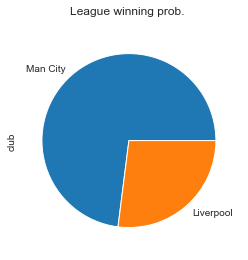

In [108]:
ax = title_race.plot.pie()
ax.set_title('League winning prob. \n')
plt.show()

In [111]:
top_4 = rankings_df.loc[rankings_df.position < 5,'club'].value_counts() / SAMPLE_NUM

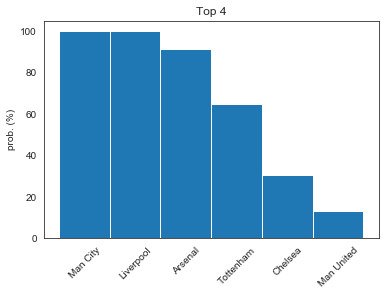

In [112]:
count_plot(top_4.index,top_4 * 100,'Top 4')

In [89]:
religated = rankings_df.loc[rankings_df.position > 17,'club'].value_counts() / SAMPLE_NUM

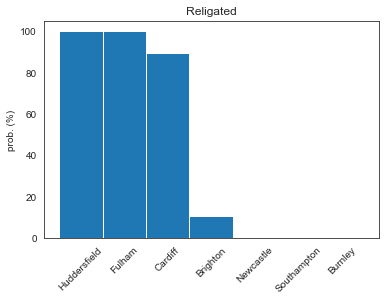

In [114]:
count_plot(religated.index,religated * 100,'Religated')